In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings

In [57]:
warnings.simplefilter(action='ignore')
plt.style.use('fivethirtyeight')

In [58]:
data = pd.read_csv("cardata.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [59]:
df = pd.DataFrame(data)
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [61]:
df.shape

(301, 9)

In [62]:
df['Year']

,Year
0,2014
1,2013
2,2017
3,2011
4,2014
...,...
296,2016
297,2015
298,2009
299,2017


#preprocessing

In [63]:
np.max(df['Year'])


2018

In [64]:
df['Age']= 2019 - df['Year']
df.drop('Year', axis=1, inplace=True)

In [65]:
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


#Types of columns

#categorical

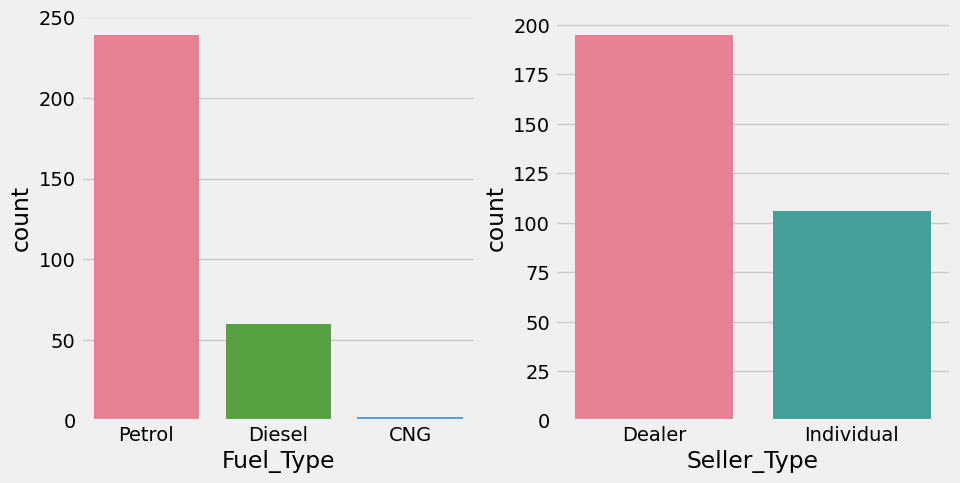

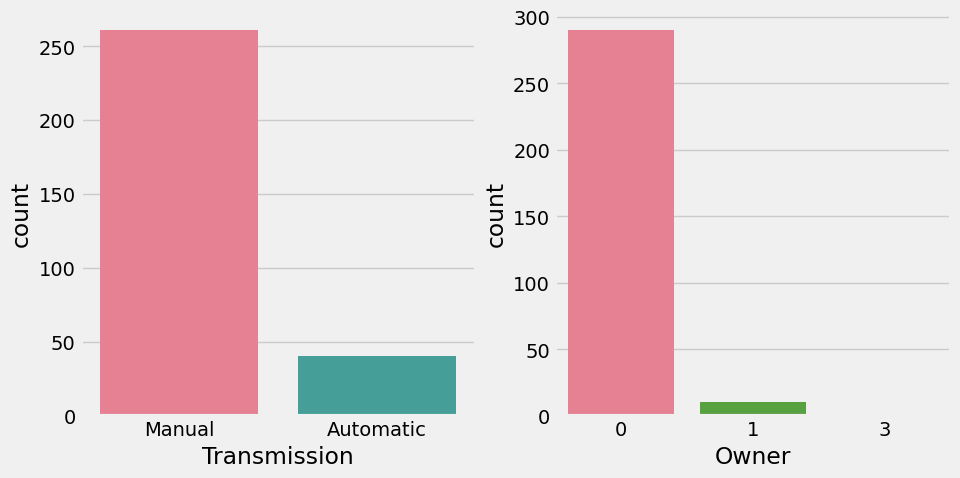

In [66]:
categorical = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    sns.countplot(x=categorical[i], data= df, palette="husl")
    i+= 1
    plt.subplot(1, 2, 2)
    sns.countplot(x=categorical[i], data= df, palette="husl")
    i+= 1
    plt.show()

#Numerical

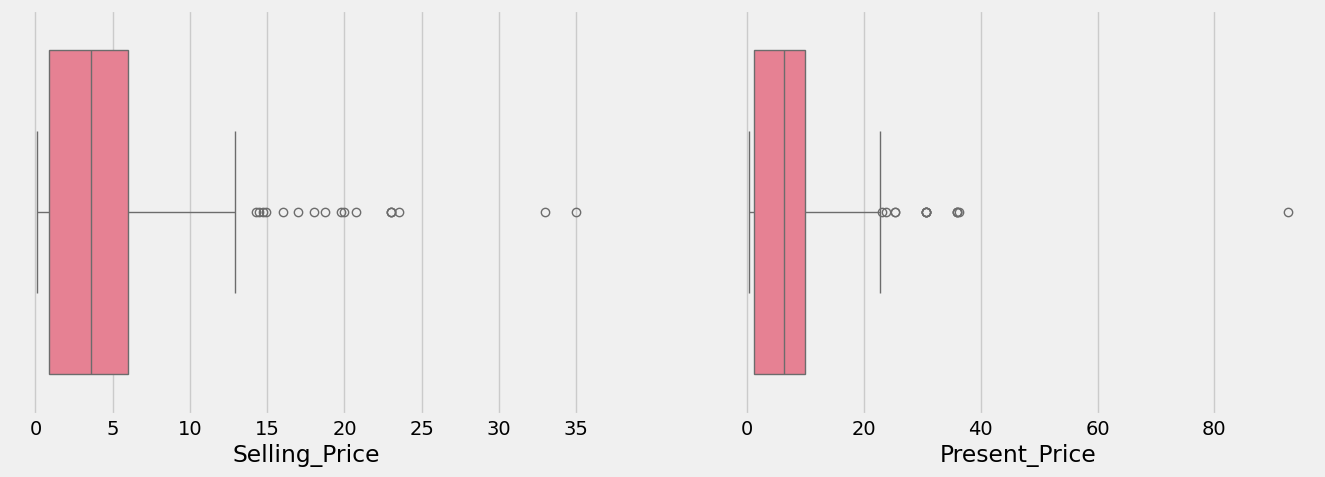

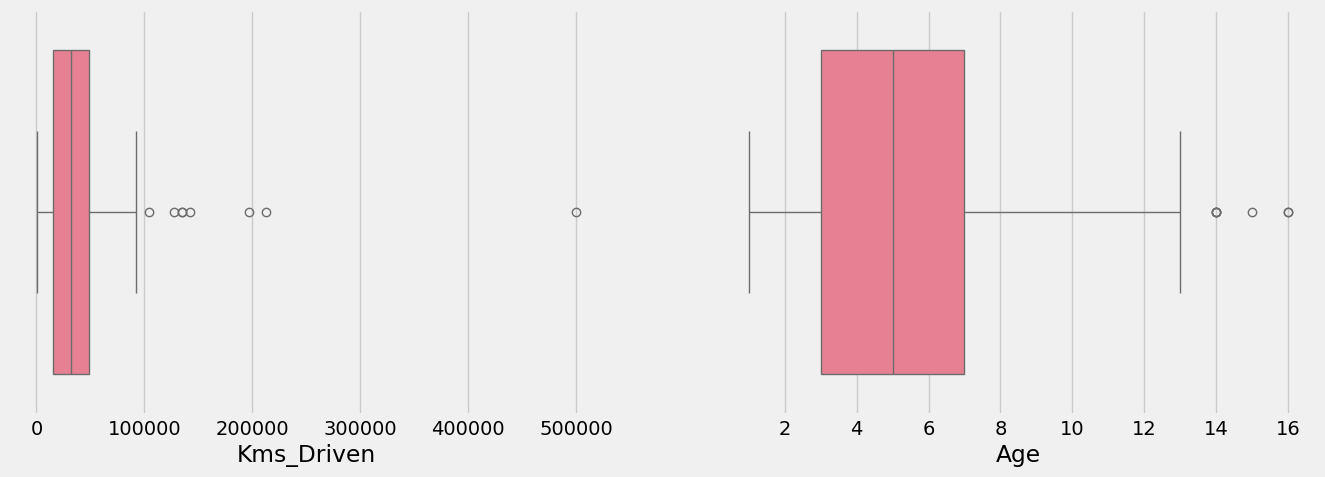

In [67]:
Numerical = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']
i = 0
while i < 4:
    fig = plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i], data= df, palette="husl")
    i+= 1
    plt.subplot(1, 2, 2)
    sns.boxplot(x=Numerical[i], data= df, palette="husl")
    i+= 1
    plt.show()

In [68]:
#print the unique values of each categorical columns to change them  numerical classification
print(pd.unique(df['Transmission']))
print(pd.unique(df['Seller_Type']))
print(pd.unique(df['Fuel_Type']))

['Manual' 'Automatic']
['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']


In [69]:
#replacing string data to numerical
df['Transmission'].replace({'Manual':2,'Automatic':3 }, inplace=True)
df['Seller_Type'].replace({'Dealer':2, 'Individual':3}, inplace=True)
df['Fuel_Type'].replace({'Petrol':2, 'Diesel':3, 'CNG':4}, inplace=True)
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2,2,2,0,5
1,sx4,4.75,9.54,43000,3,2,2,0,6
2,ciaz,7.25,9.85,6900,2,2,2,0,2
3,wagon r,2.85,4.15,5200,2,2,2,0,8
4,swift,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,3,2,2,0,3
297,brio,4.00,5.90,60000,2,2,2,0,4
298,city,3.35,11.00,87934,2,2,2,0,10
299,city,11.50,12.50,9000,3,2,2,0,2


In [70]:
df.drop('Car_Name', axis=1, inplace=True)

#Creat Model

In [71]:
x = df.drop(columns='Selling_Price', axis=1)# Drop the columns 'Selling_Price' from the dataset 'df1' to create feature set 'x'

# Extract the 'Selling_Price' column as the target variable 'y' and reshape it to be a 2D array
y = df.Selling_Price

In [72]:
# Split the dataset into training and testing sets (75% training, 25% testing) with a fixed random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (240, 7)
x_test: (61, 7)
y_train: (240,)
y_test: (61,)


In [73]:
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [74]:
print("  r2 score: ", metrics.r2_score(y_test, y_pred))
print("Mean absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

  r2 score:  0.8484549412090382
Mean absolute Error: 1.153004591615891
Mean squared Error: 3.2876460857158327
Root Mean squared Error: 1.8131867211392854


#Improve Model

In [75]:
# Initialize a K-Fold cross-validator with 10 splits
k_fold = KFold(10)

# Perform cross-validation on the entire dataset using the linear regression model and print the cross-validation scores
print(cross_val_score(model, x, y, cv=k_fold, n_jobs=1))

[ 6.63522141e-01  8.80842763e-01  7.23708463e-01  8.63126108e-01
 -4.36488306e+01 -1.07944231e+03 -3.50129071e-01  7.84378582e-01
  8.27975783e-01  8.74089252e-01]


In [76]:
# Calculate the length of the dataset divided by 10 (used for determining fold size)
len(df) / 10

30.1

In [77]:
# Create a subset of the data by removing rows from index 120 to 210 to improve model performance
data1 = df[df.index < 120]   # Select rows where the index is less than 120
data2 = df[df.index > 210]   # Select rows where the index is greater than 210

# Combine the two subsets to create a new dataset 'data3'
data3 = data1._append(data2)

# Reset the index of the new dataset 'data3' to maintain sequential indexing and drop the old index
data3.reset_index(drop=True, inplace=True)
data3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
205,9.50,11.60,33988,3,2,2,0,3
206,4.00,5.90,60000,2,2,2,0,4
207,3.35,11.00,87934,2,2,2,0,10
208,11.50,12.50,9000,3,2,2,0,2


In [78]:
x2 = data3.drop(columns='Selling_Price', axis=1)# Drop the columns 'Selling_Price' from the dataset 'data3' to create feature set 'x'

# Extract the 'Selling_Price' column as the target variable 'y' and reshape it to be a 2D array
y2 = data3.Selling_Price

In [79]:
# Split the dataset into training and testing sets (75% training, 25% testing) with a fixed random state for reproducibility
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=1)

In [80]:
model2 = LinearRegression()

model2.fit(x_train2, y_train2)

y_pred2 = model2.predict(x_test2)


In [81]:
print("  r2 score: ", metrics.r2_score(y_test2, y_pred2))
print("Mean absolute Error:", metrics.mean_absolute_error(y_test2, y_pred2))
print("Mean squared Error:", metrics.mean_squared_error(y_test2, y_pred2))
print("Root Mean squared Error:", np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))

  r2 score:  0.8793462370195001
Mean absolute Error: 1.2344068697754242
Mean squared Error: 2.623898258077042
Root Mean squared Error: 1.619845133979493


#R2_Score(2)=0.88 > R2_Score(1)=0.84

In [82]:
print("Model Intercept=", model2.intercept_)
print("Model coefs=", model2.coef_)

Model Intercept= -1.6962350442029548
Model coefs= [ 4.42320455e-01 -2.66901271e-05  2.25919515e+00 -1.26225774e+00
  2.10515821e+00 -1.13003710e+00 -4.62552614e-01]


In [83]:
y_pred2 = model2.predict([[11.23, 42000, 1, 4, 6, 1, 10]])
y_pred2

array([6.23558857])

#ok by this model prediction is 6.235 for selling price of specific data

#Lets Create  Our Model

In [84]:
x = pd.DataFrame(df, columns=['Present_Price','Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age'])
y = df.Selling_Price.values.reshape(-1, 1)
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("r2 score: ", metrics.r2_score(y_test, y_pred))
print("Mean absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score:  0.8484549412090382
Mean absolute Error: 1.153004591615891
Mean squared Error: 3.2876460857158327
Root Mean squared Error: 1.8131867211392854


#Seems Good! 88% Acc.

#But can we  Improve our Model?

#Trying to make non linear features

#Dimension = X^2

In [86]:
#making function
# Define a function to test different polynomial dimensions for the model
def check(Dimension, testsize):
    # Initialize the R2 score with a base value
     r2 =  0.8793462370195005

    # Loop through each column in the feature set 'x'
     for column in x:
        # Create a new column name by appending the dimension to the original column name
        new_col_name = column + str(Dimension)

        # Raise each value in the column to the power of 'Dimension' to create new feature values
        new_col_val = x[column] ** Dimension

        # Insert the new feature column at the beginning of the DataFrame
        x.insert(0, new_col_name, new_col_val)

        # Split the modified dataset into training and testing sets with the specified test size
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testsize, random_state=0)

        # Initialize a new linear regression model with specific solver and regularization strength
        new_model = LinearRegression()

        # Fit the linear regression model on the training data
        new_model.fit(x_train, y_train)

        # Predict the target variable on the test data using the trained model
        y_pred = new_model.predict(x_test)

        # Calculate the new R2 score for the model with the additional feature
        r2_new = metrics.r2_score(y_test, y_pred)

        # If the new R2 score is lower, remove the added column to revert to the previous feature set
        if r2_new < r2:
            x.drop([new_col_name], axis=1, inplace=True)
        # Otherwise, update the R2 score to the new higher value
        else:
            r2 = r2_new

    # Print the final R2 score after testing all columns
     print("R2 score:", r2_new)

# Call the function with a polynomial dimension of 2 and a test size of 20%
check(2, 0.2)


R2 score: 0.9266918840897181


In [87]:
#Showing x columns
x

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


#Well Done +4%

Higher dimension did not change the score , i had tried

#Another way: Dotproduct features
Do not use loop for this part if ypu have limited features

In [88]:
# Creating new features by multiplying "Present_Price" with other columns
Pres_Kms = x["Present_Price"] * x["Kms_Driven"]
Pres_Kms2 = x["Present_Price"] * x["Kms_Driven2"]
Pres_Fuel = x["Present_Price"] * x["Fuel_Type"]
Pres_Fuel2 = x["Present_Price"] * x["Fuel_Type2"]

# Creating additional new features by using "Present_Price2" and multiplying with other columns
Pres2_Kms = x["Present_Price2"] * x["Kms_Driven"]
Pres2_Kms2 = x["Present_Price2"] * x["Kms_Driven2"]
Pres2_Fuel = x["Present_Price2"] * x["Fuel_Type"]
Pres2_Fuel2 = x["Present_Price2"] * x["Fuel_Type2"]

# Inserting the newly created features back into the DataFrame at the beginning (index 0)
x.insert(0, "Pres_Kms", Pres_Kms)
x.insert(0, "Pres_Kms2", Pres_Kms2)
x.insert(0, "Pres_Fuel", Pres_Fuel)
x.insert(0, "Pres_Fuel2", Pres_Fuel2)
x.insert(0, "Pres2_Kms", Pres2_Kms)
x.insert(0, "Pres2_Kms2", Pres2_Kms2)
x.insert(0, "Pres2_Fuel", Pres2_Fuel)
x.insert(0, "Pres2_Fuel2", Pres2_Fuel2)
x

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("r2 score: ", metrics.r2_score(y_test, y_pred))
print("Mean absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score:  0.9528142925343482
Mean absolute Error: 0.7263863909732038
Mean squared Error: 1.192728159573169
Root Mean squared Error: 1.0921209454878011


# WOOO 95%! Nice?1


#Now Try K-fold

In [90]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 5)
results = (cross_val_score(model, x, y, cv=k_fold, n_jobs=1))
print(results)
print(np.mean(results))

[  0.92455675   0.47756749 -23.72880496   0.58594804   0.88655986]
-4.1708345620530105


#What? the third fold is bad in training

In [91]:
x.shape

(301, 19)

In [92]:
301/6

50.166666666666664

In [93]:
x1 = x[x.index<100]
x2 = x[x.index>151]
x_new = x1._append(x2)
x_new.reset_index(drop=True, inplace =True)
x_new

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [94]:
y = df['Selling_Price']
y1 = y[y.index<100]
y2 = y[y.index>151]
y_new = y1._append(y2)
y_new.reset_index(drop=True, inplace =True)
y_new.shape

(249,)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=0)
model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("r2 score: ", metrics.r2_score(y_test, y_pred))
print("Mean absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 score:  0.9771360806310533
Mean absolute Error: 0.6748028594139128
Mean squared Error: 0.840382730376355
Root Mean squared Error: 0.9167239117511635


#DONE !!! Almost 98%

In [97]:
x_new

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [98]:
x_test

,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,0,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,0,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,0,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,0,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,0,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,0,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,0,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,0,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,0,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,0,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [99]:
x_test.insert(0, 'y_test', y_test)
x_test.insert(0, 'y_pred', y_pred)
x_test

,y_pred,y_test,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,5.048416,5.30,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,0,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,3.905979,3.50,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,0,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,5.338839,5.50,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,0,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,4.209426,4.40,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,0,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,-0.527144,0.16,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,0,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,2.813582,2.65,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,0,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,9.412362,7.50,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,0,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,10.395981,11.75,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,0,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,3.807696,4.10,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,0,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,6.978567,6.50,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,0,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [100]:
new_df = x_test.sort_values(by= 'Present_Price')

In [101]:
a = new_df.Present_Price
b = new_df.y_test
c = new_df.Present_Price
d = new_df.y_pred

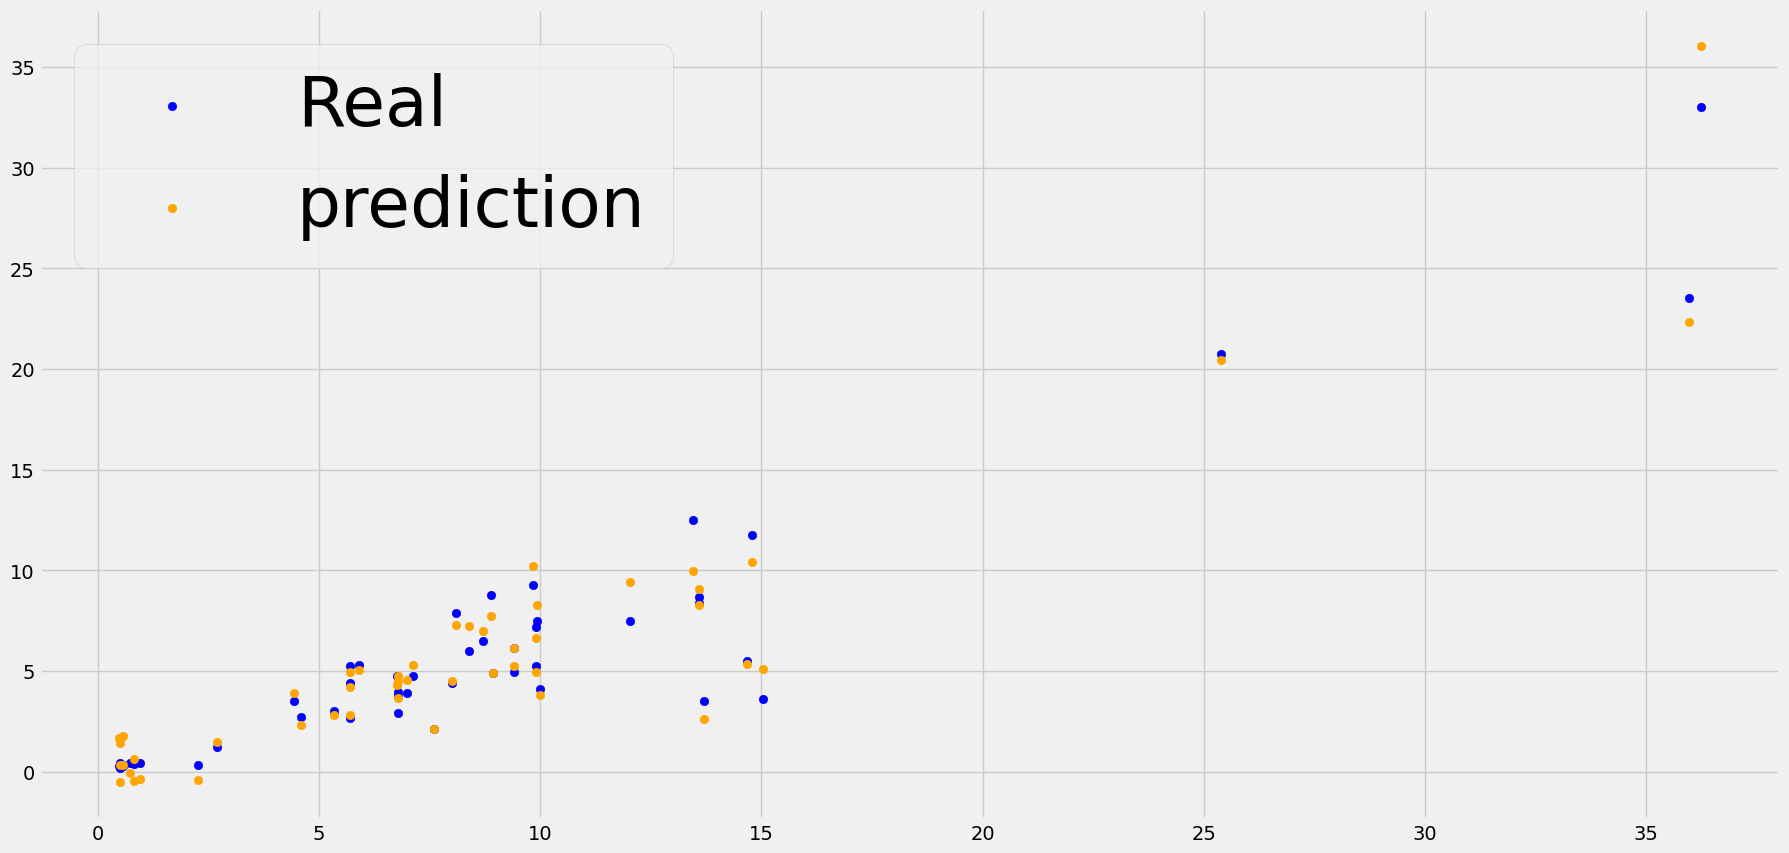

In [103]:
plt.figure(figsize=(20, 10))
plt.scatter(a, b, color='blue', label='Real')
plt.scatter(c, d, color='orange', label='prediction')
plt.legend(fontsize=50)
plt.show()

#Cost of this car?

#present price = 11.23

#KMS driven = 42000

#Fuel Type = petrol

#Seller Type = Dealer

#Transmission = Manual

#owner = 1

#Age = 10

#Price?


In [105]:
x_new.insert(0, "Target", y_new)

In [106]:
x_new.columns

Index(['Target', 'Pres2_Fuel2', 'Pres2_Fuel', 'Pres2_Kms2', 'Pres2_Kms',
       'Pres_Fuel2', 'Pres_Fuel', 'Pres_Kms2', 'Pres_Kms', 'Owner2',
       'Fuel_Type2', 'Kms_Driven2', 'Present_Price2', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
       'Age'],
      dtype='object')

In [107]:
# Defining input variables for the model
Present_price = 11.23  # Current price of the car
KMS_driven = 42000     # Total kilometers the car has been driven
Fuel_type = 2          # Fuel type (e.g., 2 = Petrol)
Seller_type = 2        # Seller type (e.g., 2 = Dealer)
Transmission = 2       # Transmission type (e.g., 2 = Manual)
Owner = 1              # Number of previous owners
Age = 10               # Age of the car in years

# Creating a DataFrame with transformed features as the input for the model
Model_Input = pd.DataFrame({
    'Target': [10],  # Target column for testing or placeholder
    'Pres2_Fuel2': [(Present_price**2) * (Fuel_type**2)],  # New feature: square of Present_price and Fuel_type
    'Pres2_Fuel': [(Present_price**2) * (Fuel_type)],      # New feature: Present_price squared and Fuel_type
    'Pres2_Kms2': [(Present_price**2) * (KMS_driven**2)],  # New feature: Present_price squared and KMS_driven squared
    'Pres2_Kms': [(Present_price**2) * (KMS_driven)],      # New feature: Present_price squared and KMS_driven
    'Pres_Fuel2': [(Present_price) * (Fuel_type**2)],      # New feature: Present_price and Fuel_type squared
    'Pres_Fuel': [(Present_price) * (Fuel_type)],          # New feature: Present_price and Fuel_type
    'Pres_Kms2': [(Present_price) * (KMS_driven**2)],      # New feature: Present_price and KMS_driven squared
    'Pres_Kms': [(Present_price) * (KMS_driven)],          # New feature: Present_price and KMS_driven
    'Owner2': [Owner**2],                                  # Square of Owner variable
    'Fuel_Type2': [Fuel_type**2],                          # Square of Fuel_type
    'Kms_Driven2': [KMS_driven**2],                        # Square of KMS_driven
    'Present_Price2': [Present_price**2],                  # Square of Present_price
    'Present_Price': [Present_price],                      # Original Present_price
    'Kms_Driven': [KMS_driven],                            # Original KMS_driven
    'Fuel_Type': [Fuel_type],                              # Original Fuel_type
    'Seller_Type': [Seller_type],                          # Original Seller_type
    'Transmission': [Transmission],                       # Original Transmission
    'Owner': [Owner],                                      # Original Owner
    'Age': [Age]                                           # Original Age
})


In [108]:
# Display the constructed DataFrame
Model_Input

,Target,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,10,504.4516,252.2258,2.224632e+11,5296741.8,44.92,22.46,1.980972e+10,471660.0,1,4,1764000000,126.1129,11.23,42000,2,2,2,1,10


In [110]:
# Appending the new input DataFrame to an existing DataFrame (Final1)
Final1 = x_new._append(Model_Input)


In [111]:
Final1

,Target,Pres2_Fuel2,Pres2_Fuel,Pres2_Kms2,Pres2_Kms,Pres_Fuel2,Pres_Fuel,Pres_Kms2,Pres_Kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,4.75,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,7.25,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,2.85,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,4.60,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4.00,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,3.35,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,11.50,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2
248,5.30,139.2400,69.6200,1.039263e+09,1.902018e+05,23.60,11.80,1.761462e+08,32237.6,0,4,29855296,34.8100,5.90,5464,2,2,2,0,3


In [112]:
x = Final1.drop(['Target'], axis=1,)[:249]
y = Final1[["Target"]][:249]
x_Final1 = Final1.drop(['Target'], axis=1,)[249:]

In [113]:
model.fit(x, y)

LinearRegression()

In [114]:
y_pred = model.predict(x_Final1)

In [115]:
y_pred

array([[5.26087684]])

#Price is 5.26

